# Explore here

In [99]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import *
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [100]:
# VER BASE DE DATOS:

df_diabetes = pd.read_csv('../data/raw/diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [101]:
df_diabetes.shape

(768, 9)

In [102]:
df_diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [103]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [104]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Al observar que los datos mínimos de prácticamente todos los valores es 0. Vamos a eliminar todos los datos cuyo valor sea 0. 

In [105]:
# ELIMINAR VALORES 0:

df_diabetes.drop(df_diabetes[(df_diabetes['Pregnancies'] == 0) |
                             (df_diabetes['Glucose'] == 0) |
                             (df_diabetes['BloodPressure'] == 0) |
                             (df_diabetes['SkinThickness'] == 0) |
                             (df_diabetes['Insulin'] == 0) |
                             (df_diabetes['BMI'] == 0)].index, inplace=True)

df_diabetes



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [106]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,3.851190,122.279762,70.244048,28.663690,155.348214,32.297321,0.518702,31.836310,0.330357
std,3.148352,30.784649,12.363401,10.249863,118.777281,6.368558,0.327689,10.458446,0.471043
min,1.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.000000,27.800000,0.268000,24.000000,0.000000
50%,3.000000,119.000000,70.000000,28.500000,125.500000,32.750000,0.446500,28.000000,0.000000
75%,6.000000,144.000000,78.000000,36.000000,190.000000,36.250000,0.688250,38.000000,1.000000
max,17.000000,197.000000,110.000000,52.000000,846.000000,57.300000,2.329000,81.000000,1.000000


In [107]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

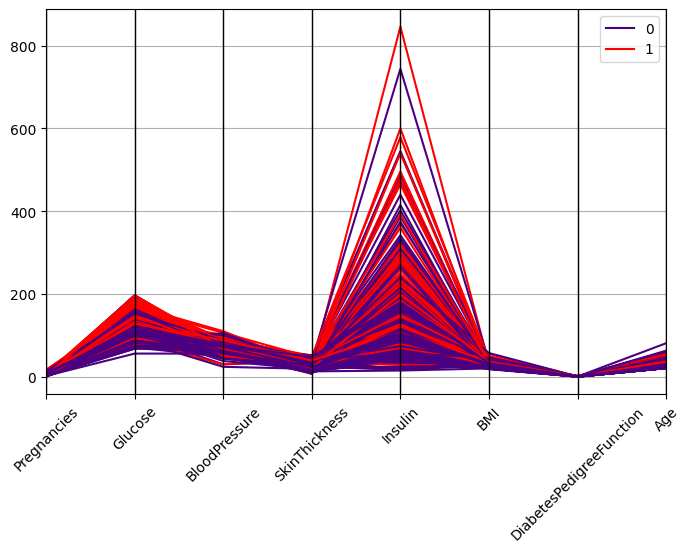

In [108]:
# VISUALIZACIÓN PARALELA DE LOS DATOS ORIGINALES:

plt.figure(figsize=(8, 5))
pd.plotting.parallel_coordinates(df_diabetes, 'Outcome', color=['indigo', 'red'])
plt.xticks(rotation=45)
plt.show()


In [109]:
# DATOS ESCALADOS:

df_diabetes = df_diabetes.reset_index(drop=True)

data_sc = pd.DataFrame(StandardScaler().fit_transform(df_diabetes.drop('Outcome', axis=1)), columns=df_diabetes.columns[:-1])
data_sc['Outcome'] = df_diabetes['Outcome']
data_sc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.906964,-1.082663,-0.343787,-0.553387,-0.517268,-0.660052,-1.074881,-1.037675,0
1,-0.270764,-1.440517,-1.639859,0.325983,-0.567858,-0.204011,-0.827327,-0.558880,1
2,-0.588864,2.430811,-0.019769,1.596185,3.268554,-0.282639,-1.102387,2.026616,1
3,-0.906964,2.170554,-0.829814,-0.553387,5.823351,-0.345541,-0.368893,2.601171,1
4,0.365437,1.422314,0.142240,-0.944218,0.165697,-1.021740,0.208733,1.835098,1
...,...,...,...,...,...,...,...,...,...
331,-0.906964,-0.041633,0.628267,1.009938,-0.685902,1.054034,-0.787596,-0.367362,0
332,-0.906964,0.186092,1.438312,1.009938,-0.382361,0.660895,1.645158,0.494470,1
333,-0.588864,-1.115195,-0.991823,-0.260263,-1.174939,-0.612876,0.755797,-0.941916,0
334,1.955938,-0.692277,0.466258,1.889308,0.207856,0.094775,-1.062656,2.984207,0


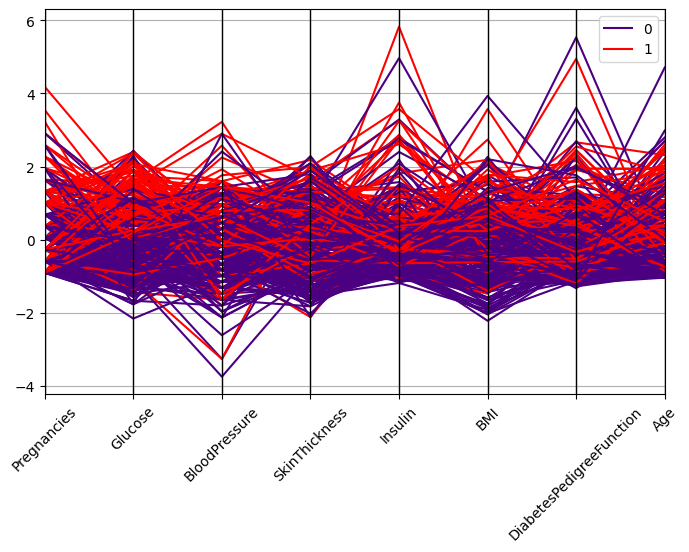

In [110]:
# VISUALIZACIÓN DE DATOS ESCALADOS:

plt.figure(figsize=(8, 5))
pd.plotting.parallel_coordinates(data_sc, 'Outcome', color=['indigo', 'red'])
plt.xticks(rotation=45)
plt.show()

In [111]:
# DIVISIÓN DE LOS DATOS:

X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

X, y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              1       89             66             23       94  28.1   
 1              3       78             50             32       88  31.0   
 2              2      197             70             45      543  30.5   
 3              1      189             60             23      846  30.1   
 4              5      166             72             19      175  25.8   
 ..           ...      ...            ...            ...      ...   ...   
 331            1      121             78             39       74  39.0   
 332            1      128             88             39      110  36.5   
 333            2       88             58             26       16  28.4   
 334           10      101             76             48      180  32.9   
 335            5      121             72             23      112  26.2   
 
      DiabetesPedigreeFunction  Age  
 0                       0.167   21  
 1                    

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ENTRENAMIENTO DE MODELOS:

In [113]:
# ÁRBOL SIMPLE:

simple_tree = DecisionTreeClassifier(max_depth=3, max_features=X_train.shape[1]//2, min_samples_leaf=20, min_samples_split=30, random_state=42)
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=4, min_samples_leaf=20,
                       min_samples_split=30, random_state=42)

In [114]:
# ÁRBOL COMPLEJO:

complex_tree = DecisionTreeClassifier(max_depth=100, min_samples_leaf=1, random_state=42)
complex_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=42)

VISUALIZACIÓN DE LOS ÁRBOLES:

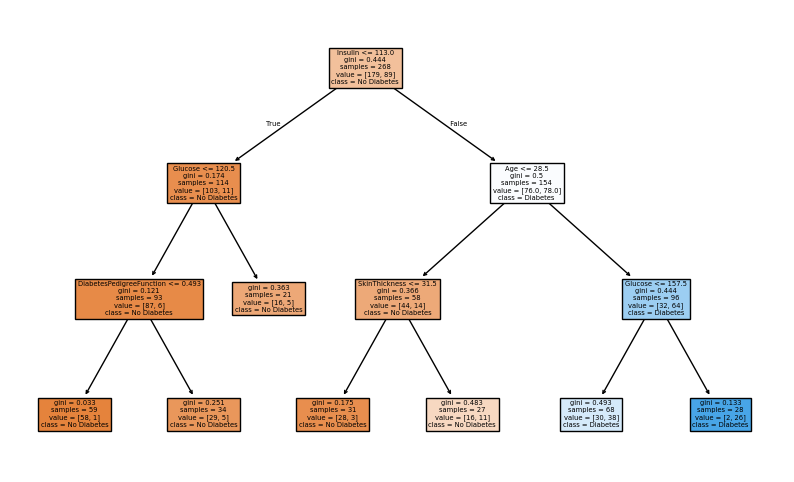

In [115]:
# VISUALIZACIÓN ÁRBOL SIMPLE:

plt.figure(figsize=(10, 6))
plot_tree(simple_tree, feature_names=X_train.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

In [116]:
X_train[(X_train['Glucose'] > 16.795) & (X_train['BMI'] <= 0.073)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [117]:
# REPRESENTACIÓN TEXTUAL DEL ÁRBOL:

text_representation = export_text(simple_tree, feature_names=list(X_train.columns))
print(text_representation)

|--- Insulin <= 113.00
|   |--- Glucose <= 120.50
|   |   |--- DiabetesPedigreeFunction <= 0.49
|   |   |   |--- class: 0
|   |   |--- DiabetesPedigreeFunction >  0.49
|   |   |   |--- class: 0
|   |--- Glucose >  120.50
|   |   |--- class: 0
|--- Insulin >  113.00
|   |--- Age <= 28.50
|   |   |--- SkinThickness <= 31.50
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  31.50
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- Glucose <= 157.50
|   |   |   |--- class: 1
|   |   |--- Glucose >  157.50
|   |   |   |--- class: 1



FUNCIONES MÉTRICAS:

In [118]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Calcular métricas para el conjunto de entrenamiento
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Calcular métricas para el conjunto de prueba
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Calcular la diferencia entre métricas de entrenamiento y prueba
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Crear un DataFrame con los resultados
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Diferencia'])

    return metrics_df

In [119]:
# EVALUACIÓN DE MODELOS:

# Evaluar el modelo complejo en entrenamiento y prueba
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

# Evaluar el modelo simple en entrenamiento y prueba
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)

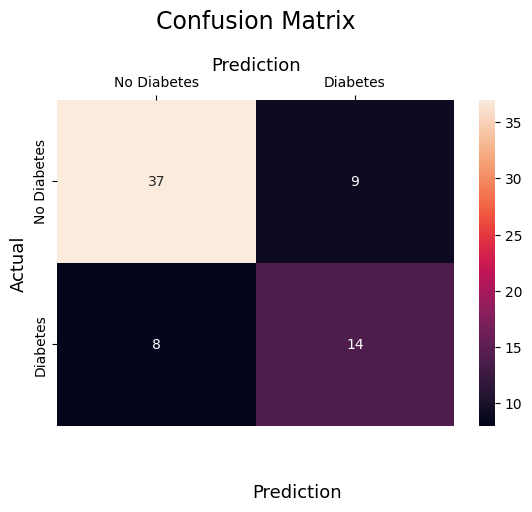

In [120]:
# MATRIZ DE CONFUSIÓN:

cm = confusion_matrix(y_test,test_pred_complex)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

El modelo acertó 37 veces cuando dijo que no hay diabetes, y acertó 14 veces cuando dijo que sí hay diabetes, también se equivocó 9 veces diciendo que había diabetes cuando no la había, y 8 veces diciendo que no había cuando sí había.

MÉTRICAS FINALES:

In [121]:
# Métricas del modelo complejo
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)
print("Árbol Complejo:")
print(get_metrics(y_train, y_test, train_pred_complex, test_pred_complex))

# Métricas del modelo simple
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)
print("Árbol Simple:")
print(get_metrics(y_train, y_test, train_pred_simple, test_pred_simple))

Árbol Complejo:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train           1.00  1.000000  1.000000   1.000000  1.000000     1.000000
Test            0.75  0.622222  0.720356   0.608696  0.636364     0.804348
Diferencia      0.25  0.377778  0.279644   0.391304  0.363636     0.195652
Árbol Simple:
            Accuracy        F1       AUC  Precision    Recall  Specificity
Train       0.787313  0.691892  0.770165   0.666667  0.719101     0.821229
Test        0.823529  0.700000  0.774704   0.777778  0.636364     0.913043
Diferencia -0.036216 -0.008108 -0.004538  -0.111111  0.082737    -0.091814


ÁRBOL COMPLEJO:

En entrenamiento acierta todo, pero en test baja mucho: parece que se ha aprendido los datos de memoria.Tiene mucha diferencia entre train y test, lo que indica sobreajuste (no generaliza bien).

ÁRBOL SIMPLE:

Rinde parecido en entrenamiento y test, sin grandes diferencias. Aunque la precisión total es un poco menor, es más estable y generaliza mejor.

CONCLUSIÓN:

Aunque el árbol complejo tiene mejores resultados en entrenamiento, no generaliza bien a nuevos datos. En cambio, el árbol simple ofrece un rendimiento más equilibrado y estable, por lo que es la mejor opción para predecir correctamente casos nuevos sin hacer trampas con los datos.